# TP 2 : crédit scoring sur gro (colab)


Nous allons travailler sur le jeu de données `gro.csv` pour faire du **credit scoring**, qui a été proposé il y a quelques années sur un site de data challenge. C'est un vrai de jeu qui contient des données avec différents types de variable, des valeurs manquantes, etc, il a été préparé et nous allons donc travailler sur sa version sans données manquantes (voir `Preparation_data_gro-corrected.ipynb`), nous allons donc importer `gro_prep_df_nomissing.csv` qui contient 37 features et le label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

import seaborn as sns

sns.set_context("notebook", font_scale=1.2)


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Machine_learning_M1_MINT/gro_prep_df_nomissing.csv', index_col=0)

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,Y
count,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6.725000e+03,6.725000e+03,6.725000e+03,6725.000000
mean,3.701706e-16,-3.550237e-17,-9.542140e-18,3.762046e-16,0.626617,0.076134,0.095613,0.003866,0.889368,0.783346,0.000297,0.192268,0.012491,0.119703,0.020372,0.765651,0.015613,0.059331,0.890112,0.034201,0.591673,0.098885,0.124164,0.017993,0.000892,0.037175,0.013680,0.000595,0.012639,0.048030,0.043271,0.007732,0.079108,0.003866,0.786766,2.017056e-16,-1.769341e-16,-2.877376e-16,0.072862
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,0.483738,0.265232,0.294082,0.062063,0.313699,0.411996,0.017244,0.394112,0.111070,0.324638,0.141279,0.423623,0.123983,0.236260,0.312774,0.181758,0.491561,0.298529,0.329793,0.132934,0.029858,0.189204,0.116169,0.024383,0.111721,0.213845,0.203482,0.087600,0.269927,0.062063,0.409622,1.000074e+00,1.000074e+00,1.000074e+00,0.259930
min,-1.258299e+00,-1.114280e+00,-5.878422e-01,-7.889463e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.165211e+00,-9.737582e+00,-2.198404e+00,0.000000
25%,-8.577183e-01,-5.954572e-01,-4.499738e-01,-7.889463e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.691868e-01,1.066106e-01,-7.184871e-01,0.000000
50%,-2.568479e-01,-1.803785e-01,-4.499738e-01,-7.889463e-01,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.355234e-01,3.239256e-01,-7.534554e-02,0.000000
75%,4.441676e-01,-1.803785e-01,-3.636856e-02,7.119487e-01,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.420400e-01,4.370363e-01,6.784440e-01,0.000000
max,6.052291e+00,4.074178e+00,1.292326e+01,1.422000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.725809e+00,7.425242e-01,2.628615e+00,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


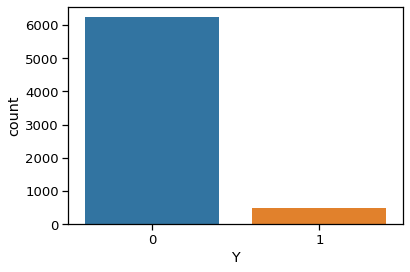

In [7]:
sns.countplot("Y", data=df)

## Séparation des features et du label
On commence par séparer le label des features.


In [8]:
# Removes the "Y" column from df and casts it into integer type
y = 2*df.pop("Y").astype("int") - 1 # pour se remettre sur -1,1
X = df

In [9]:
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Y, dtype: int64

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-0.256848,-0.180379,-0.174237,1.462396,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.100065,0.456630,0.443317
1,-1.158154,-0.180379,-0.449974,1.462396,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.483546,0.479787,0.595458
2,-0.056558,-0.647342,-0.312105,-0.788946,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.204081,-0.452708,-0.988192
3,-0.256848,-0.180379,-0.449974,0.711949,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.120067,0.497599,0.941233
4,-0.957863,-0.180379,-0.449974,1.462396,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.946247,0.326597,-0.925952


#### Question 
Quelle est la proportion de $1$ et de $-1$ dans le label ?

Dans cette question va arrondir les proportions au dixième près.

In [15]:
len(y)

6725

Le label comporte 6725 observations

In [16]:
y.value_counts()

-1    6235
 1     490
Name: Y, dtype: int64

In [17]:
total = sum(y.value_counts())
print(f"Proportion de -1 : {round(y.value_counts()[-1] * 100 / total,1)} %")
print(f"Proportion de 1 : {round(y.value_counts()[1] * 100 / total,1)} %")

Proportion de -1 : 92.7 %
Proportion de 1 : 7.3 %


Pour 6725 observations du label, 6235 ont comme valeur -1 ce qui représente environ 92,7% des observations, et 490 ont comme valeurs 1 ce qui représente environ 7,3% observations.

## Création des jeux de données Train et Test
On crée des jeux de données train (85% du jeu de données initial) et test (15%)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.15,
                                                    shuffle=True, random_state=34)

#### Question
Quelle est la proportion de $1$ et de $-1$ dans les jeux de données train et test ?

Dans cette question va arrondir les proportions au dixième près.

In [20]:
len(y_train)

5716

In [21]:
len(y_test)

1009

Ici on créé deux jeux de données de sorte à avoir un train set comportant 85% du jeu de donnnées initial (donc 5716 observations), et un test set comportant 15% du jeu de données initial (donc 1009 observations).

**Train :**

In [22]:
y_train.value_counts()

-1    5296
 1     420
Name: Y, dtype: int64

In [23]:
total = sum(y_train.value_counts())
print(f"Proportion de -1 : {round(y_train.value_counts()[-1] * 100 / total,1)} %")
print(f"Proportion de 1 : {round(y_train.value_counts()[1] * 100 / total,1)} %")

Proportion de -1 : 92.7 %
Proportion de 1 : 7.3 %


Pour le train set, on obtient environ 92,7% des observations  qui ont comme valeur -1, et environ 7,3% des observations qui ont comme valeur 1.

**Test :**

In [24]:
y_test.value_counts()

-1    939
 1     70
Name: Y, dtype: int64

In [25]:
total = sum(y_test.value_counts())
print(f"Proportion de -1 : {round(y_test.value_counts()[-1] * 100 / total,1)} %")
print(f"Proportion de 1 : {round(y_test.value_counts()[1] * 100 / total,1)} %")

Proportion de -1 : 93.1 %
Proportion de 1 : 6.9 %


Pour le test set, on obtient environ 93,1% des observations qui ont commme valeur -1, et environ 6,9% des observations qui ont comme valeur 1.

On remarque que les proportions dans les jeux de données créés sont presque les mêmes que celles dans le jeu de données initial.

#### Question 
Pour éviter la mauvaise répartion des $1$ entre le train et le test, ajouter l'option `stratify=y` dans la fonction `train_test_split`. Est ce que cela change quelque chose ? A votre avis comment se fait le split avec cette option ?

In [26]:
# On ajoute l'option "stratify=y" à la création des deux jeux de données
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.15,shuffle=True, random_state=34, stratify=y)

Dans cette question va arrondir les proportions au dixième près.

**Train :**

In [27]:
y_train.value_counts()

-1    5300
 1     416
Name: Y, dtype: int64

In [28]:
total = sum(y_train.value_counts())
print(f"Proportion de -1 : {round(y_train.value_counts()[-1] * 100 / total,1)} %")
print(f"Proportion de 1 : {round(y_train.value_counts()[1] * 100 / total,1)} %")

Proportion de -1 : 92.7 %
Proportion de 1 : 7.3 %


**Test :**

In [29]:
y_test.value_counts()

-1    935
 1     74
Name: Y, dtype: int64

In [30]:
total = sum(y_test.value_counts())
print(f"Proportion de -1 : {round(y_test.value_counts()[-1] * 100 / total, 1)} %")
print(f"Proportion de 1 : {round(y_test.value_counts()[1] * 100 / total, 1)} %")

Proportion de -1 : 92.7 %
Proportion de 1 : 7.3 %


Avec cette option en plus, on remarque un changement dans les proportions du train set et du test set. Avec ce split, les deux classes sont équitablement distribuées entre les deux data set, on aura donc approximativement la même proportion dans le train set (environ 92,7% de -1) et le test set (environ 92,7% de -1)

#### Question
Quelle est l'accuracy sur le train et sur le test du classifieur qui prédit $-1$ pour tout le monde ?

L'accuracy que l'on obtiendra sera égal à la proportion de -1 dans chaque data set (c'est-à-dire environ 92,7% pour les deux data set), nous allons verifier les résultats à l'aide la fonction "accuracy_score" issu du package metrics de sklearn.

In [31]:
import sklearn.metrics # On charge le package metrics de sklearn

**Train :**

In [32]:
y_train_naif = -np.ones_like(y_train) # On créé un modèle naif qui comporte autant d'observations que le train set et qui comporte que des -1
print(y_train_naif)
sklearn.metrics.accuracy_score(y_train, y_train_naif) # On utilise la fonction accuracy_score issu de metrics pour calculer l'accuracy de ce modèle

[-1 -1 -1 ... -1 -1 -1]


0.927221833449965

Pour le train set l'accuracy est d'environ 92,7%

**Test :**

In [33]:
y_test_naif = -np.ones_like(y_test) # On créé un modèle naif qui comporte autant d'observations que le test set et qui comporte que des -1
print(y_test_naif)
sklearn.metrics.accuracy_score(y_test, y_test_naif) # On utilise la fonction accuracy_score issu de metrics pour calculer l'accuracy de ce modèle

[-1 -1 -1 ... -1 -1 -1]


0.9266600594648167

Pour le test set l'accuracy est d'environ 92,7%

Comme prévu, on obtient bien les mêmes pourcentages de proportions de -1.

## Classification
On va calculer pour chaque classifieur l'accuracy et l'AUC sur le train et sur les test. On se concentre sur l'AUC. On a créé une fonction qui conserve les valeurs de l'accuracy et de l'auc pour toutes les méthodes que nous allons comparer.

### Metriques


In [34]:
from sklearn import metrics

In [35]:
# 5 listes qui contiendront nos différents résultats et noms des méthodes
methods = []
scores_train_accu = []
scores_train_auc = []
scores_test_accu = []
scores_test_auc = []

In [36]:
def calcul_scores(classif,nom_method,X_train=X_train, y_train=y_train,X_test=X_test, y_test=y_test,
                  scores_train_accu=scores_train_accu,
                  scores_test_accu=scores_test_accu, 
                  scores_train_auc=scores_train_auc,
                  scores_test_auc=scores_test_auc,
                  methods=methods):
    """
    classif : méthode classification
    nom_method : nom que vous donnez à la méthode
    les autres paramètres ont des valeurs par défaut
    """

    fit_model = classif.fit(X_train, y_train) # on fit la méthode sur le train
    pred_train = fit_model.predict(X_train) # on fait les prédictions sur le train
    pred_test = fit_model.predict(X_test) # on fait les prédictions sur le test
    accuracy_train = metrics.accuracy_score(y_train, pred_train) # on calcule l'accuracy sur le train
    accuracy_test = metrics.accuracy_score(y_test, pred_test) # on calcule l'accuracy sur le test

    methods.append(nom_method) # on ajoute le nom de la méthode à notre liste methods
    scores_train_accu.append(accuracy_train) # on ajoute l'accuracy à notre liste accuracy_train
    scores_test_accu.append(accuracy_test) # on ajoute l'accuracy à notre liste accuracy_test

    ######## # on calcule l'AUC sur le train
    fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_train) 
    auc_train = metrics.auc(fpr, tpr)
    scores_train_auc.append(auc_train)

    ######## # on calcule l'AUC sur le train
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test) # on calcule l'AUC sur le test
    auc_test = metrics.auc(fpr, tpr)
    scores_test_auc.append(auc_test)

    ####### on crée un dictionnaire
    scores = {'scores_train_accu' : scores_train_accu,'scores_test_accu' :scores_test_accu,
           'scores_train_auc' : scores_train_auc,'scores_test_auc' : scores_test_auc,
                  'methods' : methods}
    return(scores,fit_model) # on renvoie les scores et le fit

## SVM linéaire

In [37]:
from sklearn import svm

### Linear
On commence par un svm linéaire à paramètre $C=1$

In [38]:
C = 1.0  # SVM regularization parameter
SVM_linear = svm.SVC(kernel='linear', C=C)
scores,fit_linear_C1 = calcul_scores(SVM_linear,"svm_linear_C1")
####### on crée un pandas DataFrame à partir du dictionnaire `scores` et on l'affiche
pd.DataFrame(scores)

,scores_train_accu,scores_test_accu,scores_train_auc,scores_test_auc,methods
0,0.937544,0.939544,0.605249,0.618948,svm_linear_C1


#### Question 
L'accuracy est très bonne. Calculez la proportion de $1$ prédits sur le test et commentez.

In [39]:
y_pred = fit_linear_C1.predict(X_test)
print(f"Proportion de 1 prédits : {round(100 * (y_pred == 1).sum() / len(y_pred), 1)} %")

Proportion de 1 prédits : 2.3 %


In [40]:
sklearn.metrics.confusion_matrix(y_test,y_pred) # La matrice de confusion nous permet de mesurer la qualité du modèle, on l'affiche uniquement à titre indicatif 

array([[930,   5],
       [ 56,  18]])

Ce modèle à donc prédit environ 2.3% de 1.  



### Linear with balanced classification
Pour prendre en compte la mauvaise répartition des $-1$ et des $1$ dans les labels, on va utiliser l'option `class_weight="balanced"`


#### Question
Reprendre le code précédent en ajoutant l'option `class_weight="balanced"` à la fonction `svm.SVC`. Comparez le nombre de $1$ prédits sur le test avec et sans l'option. Commentez

In [41]:
C = 1.0  # SVM regularization parameter
SVM_linear_balanced = svm.SVC(kernel='linear', C=C, class_weight="balanced")
scores,fit_linear_C1_balanced = calcul_scores(SVM_linear_balanced,"svm_linear_C1_balanced")
####### on crée un pandas DataFrame à partir du dictionnaire `scores` et on l'affiche
pd.DataFrame(scores)

,scores_train_accu,scores_test_accu,scores_train_auc,scores_test_auc,methods
0,0.937544,0.939544,0.605249,0.618948,svm_linear_C1
1,0.905353,0.902874,0.900229,0.885374,svm_linear_C1_balanced


In [42]:
y_pred_balanced = fit_linear_C1_balanced.predict(X_test)
print(f"Proportion de 1 prédits : {round(100 * (y_pred_balanced == 1).sum() / len(y_pred), 1)} %")

Proportion de 1 prédits : 15.1 %


In [ ]:
sklearn.metrics.confusion_matrix(y_test,y_pred_balanced) # Matrice de confusion

Le nombre de 1 prédits sur le test avec l'option est plus grand que sur le test sans l'option. Cependant l'accuracy est inferieure sur le test avec l'option mais la différence entre les deux accuracy est faible (93,9 % environ sans l'option contre 90,3 % environ avec l'option). Le test avec l'option est donc meilleur que le test sans l'option.

### Cross-validation sur $C$
Voici une façon de faire de la cross-validation à 3 folds sur la valeur de $C$. Nous choissisons comme métrique pour choisir le meilleur hyperamètre l'AUC

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# A stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=3)

Dans le code suivant, nous enlevons C = 100 car le calcul ne se finissait pas, nous savons que ce n'est pas le meilleur paramètre en vérifiant sur l'énoncé les résultats qui correspondaient à ceux de C = 0.01 (au maximum C = 100 sera un aussi bon hyperparamètre que C = 0.01 sinon il sera moins bon (ce qui est le plus plausible)) 

In [46]:
params = {"C": [1e-2, 1e-1, 1.0, 1e1]}#, 1e2]} # proposition de valeurs pour C
svm_linear_balanced = svm.SVC(kernel='linear',class_weight="balanced")
svm_linear_cv = GridSearchCV(svm_linear_balanced, # classe de classifieurs
                      params, # valeurs possibles pour C
                      n_jobs=-1, # pour utiliser tous les coeurs disponibles
                      scoring="roc_auc", # pour utiliser l'AUC comme métrique
                      cv=cv # voir chunk précédent
                      )

In [47]:
scores , fit_linear_balanced_cv  = calcul_scores(svm_linear_cv,"svm_linear_balanced_cv")
pd.DataFrame(scores)

,scores_train_accu,scores_test_accu,scores_train_auc,scores_test_auc,methods
0,0.937544,0.939544,0.605249,0.618948,svm_linear_C1
1,0.905353,0.902874,0.900229,0.885374,svm_linear_C1_balanced
2,0.847446,0.853320,0.881186,0.889746,svm_linear_balanced_cv


#### Question
quelle est la valeur de $C$ choisie ?

La valeur de C choisie est celle qui nous donne la meilleure performance que l'on obtient grâce à la technique de Cross-validation en utilisant la fonction "GridSearchCV" et en créant un dictionnaire contenant les différentes valeurs à tester pour l'hyperparamètre C.

Ainsi, avec la ligne affichée plus haut sur le pandas DataFrame avec comme nom de méthode "svm_linear_balanced_cv" est celle qui est utilisée avec le meilleur paramètre C.

On obtient le meilleur hyperparamètre en écrivant la ligne de code suivante :

In [48]:
svm_linear_cv.best_params_

{'C': 0.01}

La valeur de C choisie est donc C = 0.01

## SVM radial basis function

#### Question 
Faire la même étude en cross-validation avec le noyau RBF.

In [49]:
#Cross-validation sur C avec le noyau RBF

params = {"C": [1e-2, 1e-1, 1.0, 1e1, 1e2]} # proposition de valeurs pour C
svm_RBF_balanced = svm.SVC(kernel='rbf',class_weight="balanced")
svm_RBF_cv = GridSearchCV(svm_RBF_balanced, # classe de classifieurs
                      params, # valeurs possibles pour C
                      n_jobs=-1, # pour utiliser tous les coeurs disponibles
                      scoring="roc_auc", # pour utiliser l'AUC comme métrique
                      cv=cv # voir chunk précédent
                      )

In [50]:
scores , fit_RBF_balanced_cv  = calcul_scores(svm_RBF_cv,"svm_RBF_balanced_cv")
pd.DataFrame(scores)

,scores_train_accu,scores_test_accu,scores_train_auc,scores_test_auc,methods
0,0.937544,0.939544,0.605249,0.618948,svm_linear_C1
1,0.905353,0.902874,0.900229,0.885374,svm_linear_C1_balanced
2,0.847446,0.853320,0.881186,0.889746,svm_linear_balanced_cv
3,0.910777,0.906838,0.912014,0.887513,svm_RBF_balanced_cv


In [51]:
svm_RBF_cv.best_params_

{'C': 1.0}

Avec le noyau RBF, le valeur de C qui nous donne la meilleure performance est C = 1